# Case Study Fintech Company

- The company wants to give paid subscripton to its customers which will allow to track their finances in one place.
- To attract customers the company has released a free version of the app with some main features unlocked.
- Our task is to indentify customers who will NOT enroll in the paid products so additional offers can be made to them

## DATA

- We have access to the data of customers behaviour with the app. 
- This data include Date-Time installation of the application, features that customer engaged within the app. 
- The App behaviour is charecterized as the list of app screens customer looked at and whether they engaged in the min-financial games available within the app
- The company allows only a 24 hour trial to the customer and then provides the user with offers for the premium version of the app.

## Dataset
- Our Dataset consists of :
    - user : The ID of the user
    - first_open : When the app was first opened
    - dayofweek : The day of the week 0 being Sunday and 6 being Satuday
    - age : Age of the user
    - screen_list : list of screens accesed by the user
    - numscreens : Number of screens the user has seen
    - minigame : Whether the minigame is played by the user
    - liked : Different pages of the app contains like feature and how many times the user used it.
    - used_premium_feature : A user has used the premium feature or not.
    - enrolled : User enrolled to the paid product.
    - enrolled_date : Date and Time when user enrolled to the paid product
    
### Importing Required Iibraries to start the EDA process    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


Coverting our hour column in dataset to an int type

In [4]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

Cerating a temporary dataset with columns we don't want

In [5]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [6]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


Plotting histograms to get better insights of our dataset

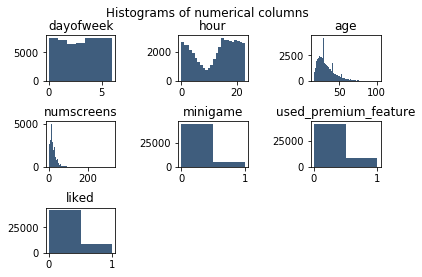

In [7]:
plt.suptitle('Histograms of numerical columns', fontsize = 12)
for i in range (1, dataset2.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals = np.size(dataset2.iloc[:, i -1 ].unique())
    plt.hist(dataset2.iloc[:, i- 1], bins = vals, color = "#3F5D7D")
    plt.subplots_adjust(hspace= 0.9, wspace= 0.9)

- Now the we have plotted our dataset we'll convert out insights into correlation by using correlation plots
- We do this in order to find out which of our attributes are important and at what magnitude they affect out final outcome i.e the users enrolled for premium version 

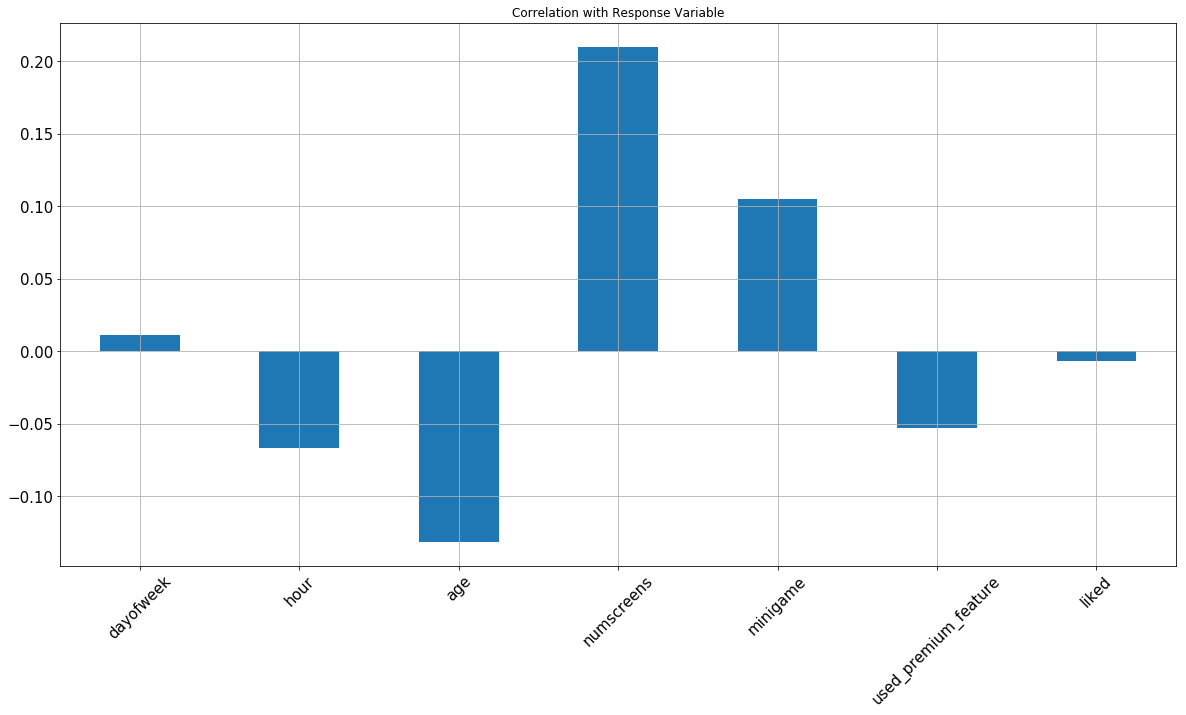

In [8]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                             title = 'Correlation with Response Variable',
                                             fontsize = 15, rot = 45,
                                             grid = True)

### Making vague conslusions from our correlation plot
- dayofweek is positively related i.e later the day of the week more likely to enroll
- hour is neagtively related i.e earlier in the day more likely to enroll
- age is negatively related i.e more young the user is more likely to enroll
- numscreens is positvely related i.e more screens visited more likely to enroll
- minigame is positvely related i.e user who played minigame is more likely to enroll
- used_premium_feature is negatively related i.e user who used premium feature is unlikely to enroll

### Now before Model Building We'll build a correlation matrix

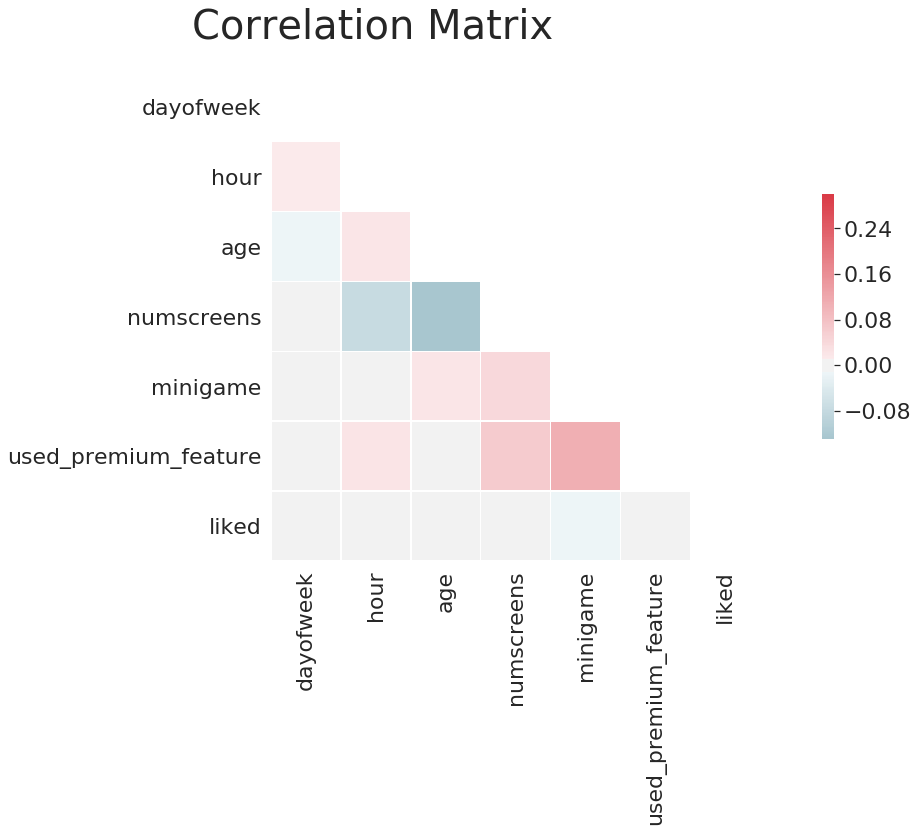

In [9]:
sn.set(style='white', font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate the mask for upper traingle
mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Setup the matplotlib Figure
f ,ax = plt.subplots(figsize = (22,9))
f.suptitle('Correlation Matrix', fontsize = 40)

# Generate a Custome dividing colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#Draw heatmap with mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3 , center=0, square=True, linewidths=0.5, cbar_kws={"shrink" : 0.5})

### Now we'll format the listed screens 
- We have a csv that gives us the list of screens that are used more frequently
- We'll format the screen_list using this csv file

In [10]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [11]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [12]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [13]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",","")
    

In [14]:
dataset['Other'] = dataset.screen_list.str.count(",")
dataset.drop(columns=['screen_list'])

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaN,...,1,0,0,0,0,0,0,0,0,7
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,5
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,6
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,10
5,56480,2013-04-03 09:58:15.752,2,9,20,14,0,0,1,2013-04-03 09:59:03.291,...,0,0,0,0,0,0,0,0,0,6
6,144649,2012-12-25 02:33:18.461,1,2,35,3,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,3
7,249366,2012-12-11 03:07:49.875,1,3,26,41,0,1,0,NaN,...,0,0,0,0,0,0,1,0,0,8
8,372004,2013-03-20 14:22:01.569,2,14,29,33,1,1,1,2013-04-27 22:24:54.542,...,0,0,0,0,1,0,0,0,0,19
9,338013,2013-04-26 18:22:16.013,4,18,26,19,0,0,1,2013-04-26 18:31:58.923,...,0,0,0,0,0,0,0,0,0,11


- We created a sperate column for each top screen that was accessed by the user 
- We counted all the other screens visited in a single attribute 'Other'
- Then dropped the screen_list attruibute 

### Funnels
- Now we'll be creating the funnels for every screens that are from the same module
- For eg : There are screen for Savings, Loan, Credit and CC

In [15]:
saving_screens = ["Saving1","Saving2","Saving2Amount","Saving4","Saving5","Saving6","Saving7","Saving8","Saving9","Saving10"]
dataset['SavingsCount'] = dataset[saving_screens].sum(axis = 1)
dataset.drop(columns= saving_screens)

cm_screens = ["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard"]
dataset['CMCount'] = dataset[cm_screens].sum(axis = 1)
dataset.drop(columns= cm_screens)

cc_screens = ["CC1","CC1Category","CC3"]
dataset['CCCount'] = dataset[cc_screens].sum(axis = 1)
dataset.drop(columns= cc_screens)

loan_screens = ["Loan","Loan2","Loan3","Loan4"]
dataset['LoansCmount'] = dataset[loan_screens].sum(axis = 1)
dataset.drop(columns= loan_screens)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCmount
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,...,0,0,0,0,0,10,0,2,0,1
5,56480,2013-04-03 09:58:15.752,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,...,0,0,0,0,0,6,0,2,0,1
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview,",3,0,0,0,...,0,0,0,0,0,3,0,0,0,0
7,249366,2012-12-11 03:07:49.875,1,3,26,"Home,product_review,product_review2,ScanPrevie...",41,0,1,0,...,0,0,1,0,0,8,0,2,0,1
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,...,0,0,0,0,0,19,0,0,0,3
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,product_review,product_review,product_rev...",19,0,0,1,...,0,0,0,0,0,11,0,0,0,1


In [16]:
dataset.to_csv('new_appdata10.csv', index = False)

## Now we'll be building our model

In [31]:
#### Importing Libraries ####

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

app_dataset = pd.read_csv('new_appdata10.csv')


#### Data Pre-Processing ####

# Splitting Independent and Response Variables
response = app_dataset['enrolled']
app_dataset = app_dataset.drop(columns=['enrolled','screen_list', 'enrolled_date', 'first_open'])

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(app_dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [32]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [37]:
#Model Building

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0 ,penalty='l2',solver = 'lbfgs')
# We are using l1 penalty here beacuse let's suppose there is a screen that happens just before the enrollment screen
# Thus it will have a bigger coefficent in our Logistic Regression Model so l1 penalty will be higher on the screen 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,classification_report

cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      3779
           1       0.79      0.83      0.81      6221

   micro avg       0.76      0.76      0.76     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.76      0.76      0.76     10000



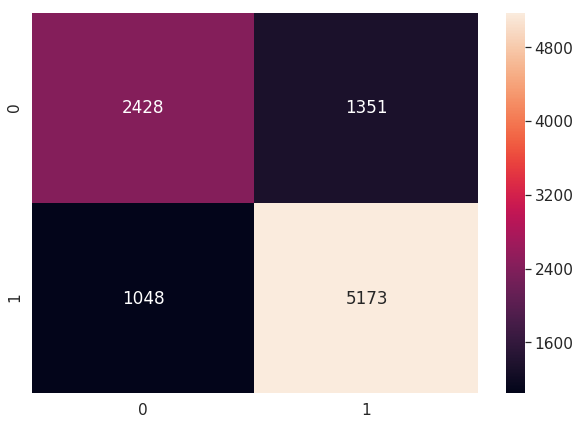

In [39]:
# Plotting our Seaborn Hetmap
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

In [40]:
# Using K_fold Cross Validation to check for overfitting
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y= y_train, cv =10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.012)
